## Modeling Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset

   Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.

    b. Visualize the results of your clustering.

    c. Use the elbow method to visually select a good value for k.

    d. Repeat the clustering, this time with 3 different features.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

In [ ]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

In [ ]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

a. Choose features other than the ones used in the lesson.

In [ ]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

In [ ]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
X_scaled.head()

In [ ]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [ ]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

b. Visualize the results of your clustering.

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
X_scaled.head()

In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_width', y='sepal_width', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [ ]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

In [ ]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

In [ ]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_width', y='sepal_width', data=iris, hue='cluster')
# plot cluster centers (centroids)
centroids.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

c. Use the elbow method to visually select a good value for k.

In [ ]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='speal width')

d. Repeat the clustering, this time with 3 different features.

In [ ]:
X = iris[['sepal_width', 'petal_length', 'petal_width']]
X.head()

In [ ]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
X_scaled.head()

In [ ]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [ ]:
iris.sample(15)

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
X_scaled.head()

In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_width', y='sepal_width', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [ ]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

In [ ]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_length', 'petal_width'].mean()
centroids

In [ ]:
X = iris[['sepal_width', 'petal_length', 'petal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [ ]:
import wrangle_mall

df = wrangle_mall.get_mallcustomer_data()
df.head()

In [ ]:
wrangle_mall.summarize(df)

In [ ]:
df = wrangle_mall.mall_encoder(df, ['gender'])

In [ ]:
df.head()

In [ ]:
X = df[['annual_income', 'spending_score']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

In [ ]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
# make a new column names cluster in df and X_scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [ ]:
df.head()

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
X_scaled['cluster'] = 'cluster_' + df.cluster.astype(str)
X_scaled.head()

In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='annual_income', y='spending_score', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='annual_income', y='spending_score', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers (scaled)')
plt.legend();

In [ ]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

In [ ]:
# Centriods for unscaled data?
centroids = df.groupby('cluster')['annual_income', 'spending_score'].mean()
centroids

In [ ]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='annual_income', y='spending_score', data=df, hue='cluster')
# plot cluster centers (centroids)
centroids.plot.scatter(x='annual_income', y='spending_score', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')
plt.title('Visualizing Cluster Centers (unscaled)')
plt.legend();

In [ ]:
X = df[['annual_income', 'spending_score']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

The graphs for the above exercises do not show much (if any) difference between scaled and unscaled data. This could be attributed to features having the same scale of units.

## Bonus

a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

b) Visualize the data and guess the number and shape of the clusters.

c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

d) Repeat the step above but with scaled data.

c) Write down the takeaways from this exercise.

In [ ]:
# sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing'

# csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv('cluster_data.csv')
df.head()

b) Visualize the data and guess the number and shape of the clusters.

looks like it should be 2 clusters, mostly oval in shape

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(df.x, df.y)
plt.show()

In [ ]:
df.hist()

c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

In [ ]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(df)

# Use (predict using) the thing 
kmeans.predict(df)

In [ ]:
df['cluster'] = kmeans.predict(df)

In [ ]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

In [ ]:
centroids = df.groupby('cluster')['x', 'y'].mean()
centroids

In [ ]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='x', y='y', data=df, hue='cluster')
# plot cluster centers (centroids)
centroids.plot.scatter(x='x', y='y', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')
plt.title('Visualizing Cluster Centers (unscaled)')
plt.legend();

d) Repeat the step above but with scaled data.

In [ ]:
df2 = df[['x', 'y']]
scaler = StandardScaler().fit(df2)
df_scaled = pd.DataFrame(scaler.transform(df2), columns= df2.columns).set_index([df2.index.values])
df_scaled.head()

In [ ]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(df_scaled)

# Use (predict using) the thing 
kmeans.predict(df_scaled)

In [ ]:
df_scaled['cluster'] = kmeans.predict(df_scaled)

In [ ]:
df_scaled['cluster'] = 'cluster_' + df_scaled.cluster.astype(str)
df_scaled.head()

In [ ]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = df2.columns)
centroids_scaled

In [ ]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='x', y='y', data=df_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='x', y='y', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers (scaled)')
plt.legend();

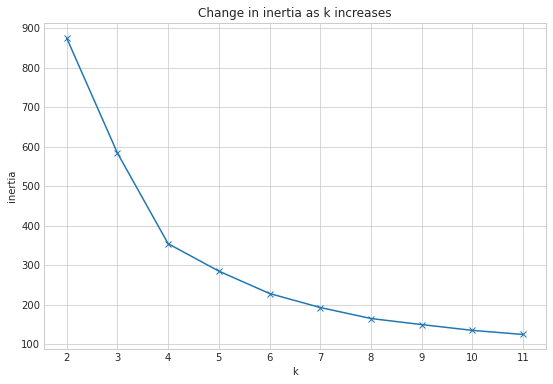

In [64]:
df_scaled = df_scaled[['x', 'y']]
# lets plot inertia vs k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(df_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [66]:
df_scaled['cluster'] = kmeans.predict(df_scaled)

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(df_scaled).predict(df_scaled)
    ax.scatter(df_scaled.x, df_scaled.y, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='x', ylabel='y')

ValueError: Incorrect number of features. Got 3 features, expected 2.